# Covid-19 Circular Case Rate in Southeast Asian Countries in 2020

by Gilbert Agus Trianto,

## Description

### Objective

How high was the spread of covid cases in this Southeast Asian Country during 2020 based on cases per case date.
The cases of Covid-19 that you want to know include, starting from confirmed cases of Covid, deaths from Covid, the recovery rate from Covid, the number of Covid patients who are still actively experiencing Covid.

### Problem Statement

1. Covid-19 hit many countries in the world, inseparable from Southeast Asia which also experienced cases of covid-19 and even had a high death rate due to covid-19. In this analysis, analysts try to analyze countries in Southeast Asia in the 2020 period to obtain data that can be processed for further research.
2. The analysis can be used as a lesson for other countries regarding cases of handling Covid-19 in the future. Learning from the high recovery rate or from the low number of Covid-19 cases that have occurred can be useful learning materials.
3. Data:
     - Covid confirmation is a numerical value that continues to increase based on each incident per day.
     - Death due to covid is a numerical value that is continuously increasing based on each incident per day.
     - Recovery from covid is a numerical value that continues to increase based on each incident per day.
     - Covid patients who are active covid is a numeric value that changes according to the events per day.
    
    All of data is cumulative data in every country, and changes in every date per case.
4. Results from the analysis is statistik data from every different case in every country.

## Working Area

Dataset taken from google cloud 'Big Data Query' / SQL BigQuery with the topic covid-19 The data retrieved is processed using the query as follows:

    SELECT * FROM `bigquery-public-data.covid19_jhu_csse_eu.summary` WHERE (country_region IN ('Indonesia','Malaysia', 'Philippines', 'Thailand', 'Vietnam', 'Burma', 'Singapore', 'Brunei', 'Laos', 'Cambodia', 'Timor-Leste')) AND (EXTRACT(YEAR FROM date) = 2020)


This query displays covid-19 data in a list of countries in Southeast Asia in 2020.

In [35]:
# Import libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Displays the result data from SQL BigQuery and converts the 'date' data type to datetime 
# so that it can also be processed in a Time Series manner
covidData = pd.read_csv('southEashAsian_covid2020.csv', parse_dates=["date"])

In [3]:
covidData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   province_state  0 non-null      float64       
 1   country_region  3504 non-null   object        
 2   date            3504 non-null   datetime64[ns]
 3   latitude        3286 non-null   float64       
 4   longitude       3286 non-null   float64       
 5   location_geom   3286 non-null   object        
 6   confirmed       3502 non-null   float64       
 7   deaths          3460 non-null   float64       
 8   recovered       3466 non-null   float64       
 9   active          3128 non-null   float64       
 10  fips            0 non-null      float64       
 11  admin2          0 non-null      float64       
 12  combined_key    3128 non-null   object        
dtypes: datetime64[ns](1), float64(9), object(3)
memory usage: 356.0+ KB


In [4]:
covidData.head()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,NaN,Brunei,2020-05-15,4.53530,114.727700,POINT(114.7277 4.5353),141.0,1.0,135.0,5.0,NaN,NaN,Brunei
1,NaN,Burma,2020-05-15,21.91620,95.956000,POINT(95.956 21.9162),182.0,6.0,89.0,87.0,NaN,NaN,Burma
2,NaN,Cambodia,2020-05-15,11.55000,104.916700,POINT(104.9167 11.55),122.0,0.0,122.0,0.0,NaN,NaN,Cambodia
3,NaN,Indonesia,2020-05-15,-0.78930,113.921300,POINT(113.9213 -0.7893),16496.0,1076.0,3803.0,11617.0,NaN,NaN,Indonesia
4,NaN,Laos,2020-05-15,19.85627,102.495496,POINT(102.495496 19.85627),19.0,0.0,14.0,5.0,NaN,NaN,Laos


In [5]:
covidData.tail()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
3499,NaN,Philippines,2020-06-08,12.879721,121.774017,POINT(121.774017 12.879721),22474.0,1011.0,4637.0,16826.0,NaN,NaN,Philippines
3500,NaN,Singapore,2020-06-08,1.283300,103.833300,POINT(103.8333 1.2833),38296.0,25.0,25368.0,12903.0,NaN,NaN,Singapore
3501,NaN,Thailand,2020-06-08,15.870032,100.992541,POINT(100.992541 15.870032),3119.0,58.0,2973.0,88.0,NaN,NaN,Thailand
3502,NaN,Timor-Leste,2020-06-08,-8.874217,125.727539,POINT(125.727539 -8.874217),24.0,0.0,24.0,0.0,NaN,NaN,Timor-Leste
3503,NaN,Vietnam,2020-06-08,14.058324,108.277199,POINT(108.277199 14.058324),332.0,0.0,316.0,16.0,NaN,NaN,Vietnam


In [6]:
# Counts how much data is in the DataFrame
len(covidData)

3504

Sort dataframes based on date per event to make it easier to get the latest and oldest data values.

In [7]:
#Sort data base on date
covidData.sort_values('date', inplace=True)

In [8]:
# Remove empty and unnecessary columns
covidData.drop(columns=['province_state','fips','admin2'], inplace=True)

In [9]:
# See country list in dataframe
covidData['country_region'].unique()

array(['Thailand', 'Malaysia', 'Philippines', 'Singapore', 'Vietnam',
       'Cambodia', 'Indonesia', 'Brunei', 'Timor-Leste', 'Laos', 'Burma'],
      dtype=object)

#### Cleaning Dataset

In [10]:
# Check null data
covidData.isnull().sum()

country_region      0
date                0
latitude          218
longitude         218
location_geom     218
confirmed           2
deaths             44
recovered          38
active            376
combined_key      376
dtype: int64

In [11]:
# Check duplicated data
covidData.duplicated().sum()

0

In [12]:
#Drop data yang duplicate
covidData.drop_duplicates(inplace=True)

In [13]:
# Create new dataframe and choses necessary column 
# and sorting by 'date' 
SEACovidData = covidData[['country_region','confirmed','deaths','recovered','active','date']]

In [14]:
SEACovidData

,country_region,confirmed,deaths,recovered,active,date
704,Thailand,2.0,NaN,NaN,NaN,2020-01-22
3457,Malaysia,NaN,NaN,NaN,NaN,2020-01-23
3456,Philippines,NaN,NaN,NaN,NaN,2020-01-23
3455,Singapore,1.0,NaN,NaN,NaN,2020-01-23
3454,Thailand,3.0,NaN,NaN,NaN,2020-01-23
...,...,...,...,...,...,...
1623,Indonesia,743198.0,22138.0,611097.0,109963.0,2020-12-31
1622,Cambodia,378.0,0.0,362.0,16.0,2020-12-31
1621,Burma,124630.0,2682.0,107069.0,14879.0,2020-12-31
1629,Timor-Leste,44.0,0.0,32.0,12.0,2020-12-31


In [15]:
# Check null data
SEACovidData.isnull().sum()

country_region      0
confirmed           2
deaths             44
recovered          38
active            376
date                0
dtype: int64

In [16]:
# Fill null column with 0 numbers
SEACovidData.fillna(0, inplace=True)

C:\Users\PLN\AppData\Local\Temp\ipykernel_10220\3833011399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SEACovidData.fillna(0, inplace=True)


In [17]:
# Check null data
SEACovidData.isnull().sum()

country_region    0
confirmed         0
deaths            0
recovered         0
active            0
date              0
dtype: int64

Grouping data by creating a new dataframe named 'SEACovidData'

In [18]:
# Chane columns name from country region to Country name
SEACovidData.rename(columns={'country_region':'Country name'}, inplace=True)
SEACovidData

C:\Users\PLN\AppData\Local\Temp\ipykernel_10220\2866177952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SEACovidData.rename(columns={'country_region':'Country name'}, inplace=True)


,Country name,confirmed,deaths,recovered,active,date
704,Thailand,2.0,0.0,0.0,0.0,2020-01-22
3457,Malaysia,0.0,0.0,0.0,0.0,2020-01-23
3456,Philippines,0.0,0.0,0.0,0.0,2020-01-23
3455,Singapore,1.0,0.0,0.0,0.0,2020-01-23
3454,Thailand,3.0,0.0,0.0,0.0,2020-01-23
...,...,...,...,...,...,...
1623,Indonesia,743198.0,22138.0,611097.0,109963.0,2020-12-31
1622,Cambodia,378.0,0.0,362.0,16.0,2020-12-31
1621,Burma,124630.0,2682.0,107069.0,14879.0,2020-12-31
1629,Timor-Leste,44.0,0.0,32.0,12.0,2020-12-31


Grouping covid data from certain countries, in this case we choose Indonesia to carry out our analysis of the covid cases that have occurred in Indonesia

In [19]:
# Showing covid patients in Indonesia
covidIndonesia = SEACovidData[SEACovidData["Country name"] == "Indonesia"]

In [20]:
covidIndonesia

,Country name,confirmed,deaths,recovered,active,date
339,Indonesia,2.0,0.0,0.0,0.0,2020-03-02
1338,Indonesia,2.0,0.0,0.0,0.0,2020-03-03
1747,Indonesia,2.0,0.0,0.0,0.0,2020-03-04
3441,Indonesia,2.0,0.0,0.0,0.0,2020-03-05
1949,Indonesia,4.0,0.0,0.0,0.0,2020-03-06
...,...,...,...,...,...,...
361,Indonesia,713365.0,21237.0,583676.0,108452.0,2020-12-27
1551,Indonesia,719219.0,21452.0,589978.0,107789.0,2020-12-28
2815,Indonesia,727122.0,21703.0,596783.0,108636.0,2020-12-29
344,Indonesia,735124.0,21944.0,603741.0,109439.0,2020-12-30


Displays the number of deaths during 2020 in the country of Indonesia, because death data is cumulative, look for data in the last order in the dataframe

In [21]:
covidIndonesia.iloc[-1].deaths

22138.0

Displays data on covid cases that occurred at the end of 2020 in the country of Indonesia to find out how far the impact of covid was on the country of Indonesia

In [22]:
covidIndonesia.tail(1)

,Country name,confirmed,deaths,recovered,active,date
1623,Indonesia,743198.0,22138.0,611097.0,109963.0,2020-12-31


Displays data on covid cases in Laos that occurred in 2020

In [23]:
# Looking for data on covid cases in 2020 that occurred in Laos
covidLaos = SEACovidData[SEACovidData["Country name"] == "Laos"]

In [24]:
covidLaos

,Country name,confirmed,deaths,recovered,active,date
2141,Laos,2.0,0.0,0.0,2.0,2020-03-24
637,Laos,3.0,0.0,0.0,3.0,2020-03-25
2097,Laos,6.0,0.0,0.0,6.0,2020-03-26
225,Laos,6.0,0.0,0.0,6.0,2020-03-27
985,Laos,8.0,0.0,0.0,8.0,2020-03-28
...,...,...,...,...,...,...
362,Laos,41.0,0.0,37.0,4.0,2020-12-27
1552,Laos,41.0,0.0,40.0,1.0,2020-12-28
2816,Laos,41.0,0.0,40.0,1.0,2020-12-29
345,Laos,41.0,0.0,40.0,1.0,2020-12-30


In [25]:
# Find out the number of covid cases that occurred in the country of Laos during 2020
len(covidLaos)

283

Displays the 5 countries in Southeast Asia that experienced the highest number of deaths caused by covid in 2020 based on country names and data on deaths that occurred.

In [26]:
SEACovidData.groupby("Country name")["deaths"].max().sort_values(ascending=False).head()

Country name
Indonesia      22138.0
Philippines     9244.0
Burma           2682.0
Malaysia         471.0
Thailand          63.0
Name: deaths, dtype: float64

Displays covid confirmation numbers and covid recovery rates in 2020 in each Southeast Asian country and gets a comparison of data for each country which is useful for learning from covid cases that have occurred in each country.

Data grouping is done by country name, confirmation of Covid cases that have occurred and recovery from Covid in each country by taking the largest value from each indicator of Covid cases.

In [27]:
SEACovidData.groupby(["Country name"])[["confirmed","recovered"]].max()

,confirmed,recovered
Country name,,
Brunei,157.0,149.0
Burma,124630.0,107069.0
Cambodia,378.0,362.0
Indonesia,743198.0,611097.0
Laos,41.0,40.0
Malaysia,113010.0,88941.0
Philippines,474064.0,439796.0
Singapore,58599.0,58449.0
Thailand,7163.0,4273.0


Find the average value of active covid cases that occurred during 2020 in Southeast Asian countries.
The data obtained is sorted based on the incidence of active Covid cases each month and was found starting from March to December 2020.

In [28]:
covidLaos.groupby(SEACovidData.date.dt.month)["active"].mean()

date
3      6.250000
4     14.466667
5      6.096774
6      0.400000
7      0.258065
8      1.580645
9      1.100000
10     1.354839
11     4.900000
12     7.161290
Name: active, dtype: float64

Displays a visualization of comparative data for 5 countries that have experienced the most deaths from Covid throughout 2020.

[Text(0, 0, '22138'),
 Text(0, 0, '9244'),
 Text(0, 0, '2682'),
 Text(0, 0, '471'),
 Text(0, 0, '63')]

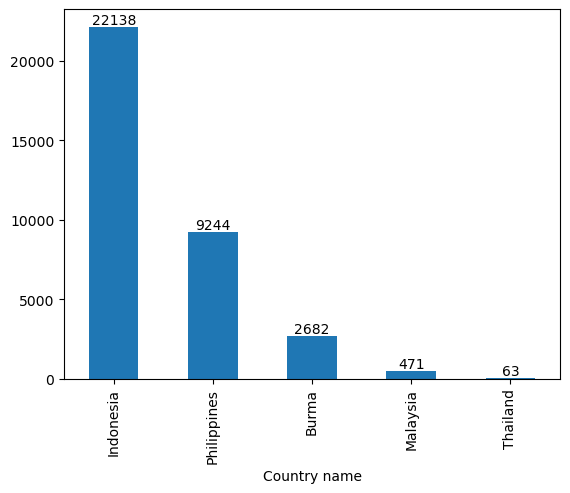

In [29]:
# Displays a comparison graph of the most deaths ever in the top 5 countries in Southeast Asia
ax = SEACovidData.groupby("Country name")["deaths"].max().sort_values(ascending=False).head().plot(kind='bar')
ax.bar_label(ax.containers[0], fmt='%.0f')

Based on the comparison results, Indonesia was found to be the country that experienced the most cases of death due to Covid during 2020 in a Southeast Asian country with a total of 22138 deaths.

Displays a visualization of the trend of increasing covid cases in the country of Indonesia in line with 2020 every month.

Text(0.5, 0, 'Month')

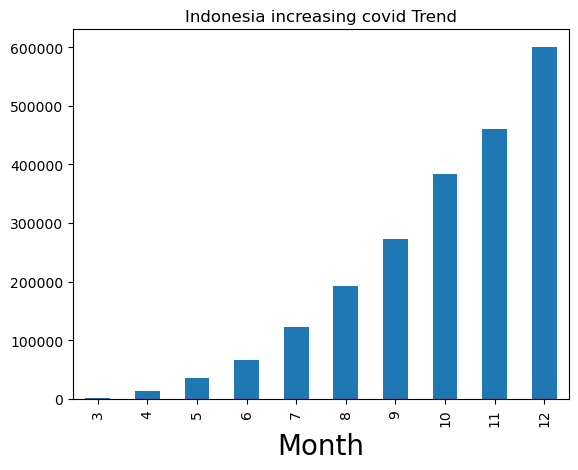

In [46]:
# Display exponential number of deaths every month in Indonesia
cvd = covidIndonesia.groupby(covidIndonesia.date.dt.month)['deaths'].sum()
# ax.bar_label(ax.containers[0], fmt='%.0f')
cvd.plot(
    kind="bar",
    title="Indonesia increasing covid Trend"
)
plt.xlabel("Month", fontsize=20)

In [47]:
monthDic = {3:"Mar",4:"Apr", 5:'May', 6:'Jun', 7:'Jul', 8:'Ags', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
cvd.rename(monthDic)

date
Mar       989.0
Apr     14067.0
May     35759.0
Jun     66560.0
Jul    122962.0
Ags    192605.0
Sep    272524.0
Oct    383309.0
Nov    459696.0
Dec    600212.0
Name: deaths, dtype: float64

<Axes: title={'center': 'Indonesia increasing covid Trend'}, xlabel='Month', ylabel='Num of case'>

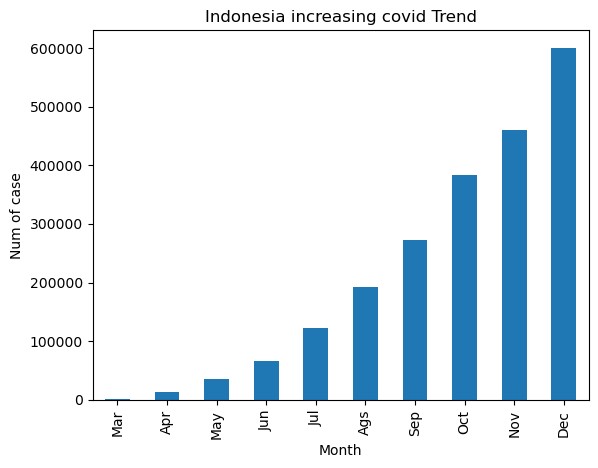

In [49]:
cvd.rename(monthDic).plot(
    kind="bar",
    title="Indonesia increasing covid Trend",
    xlabel='Month',
    ylabel="Num of case"
)

The increase in the Covid case in Indonesia experienced its peak at the end of 2020 PAD in December.

Displays visualization of the comparison of Covid confirmation and death from Covid during 2020 in Southeast Asian countries.

<Axes: xlabel='Country name'>

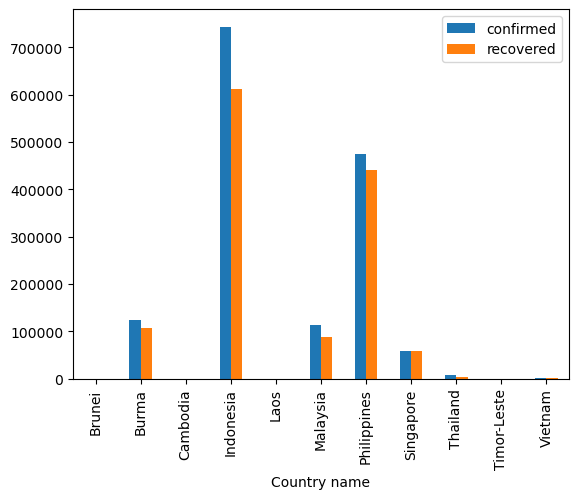

In [50]:
SEACovidData.groupby(["Country name"])[["confirmed","recovered"]].max().plot(kind="bar")

Based on the results of visualization, it was found that the Covid confirmation value was higher than the death value due to COVID.

Countries that experience Covid confirmation and death from Covid are almost the same experienced by Singapore countries, this can be a review of events that exist in Covid in Singapore.

## Conclusion, Assumptions, Overall Analysis

Conclusion:
- Every Southeast Asian country that experiences Covid-19 experiences a significant increase every year, for example Indonesia.The greater the country, the higher the covid rate.
- Covid confirmation rates that are always increasing proportional to the increasing mortality rate and also a slight difference between COVID confirmation and death.
- The available data can be used well to be useful as a review of COVID handling.

Assumption:
- Indonesia gets a high covid number due to a large area of country, while Timor-Leste gets a low Covid number due to a small country.
- Singapore becomes a country that experiences covid which results in death which is proportional to the confirmation of patients with Covid, this is displayed from the visual results of the COVID comparison graph.

Overall analysis

Covid-19 in Southeast Asia has increased every month in 2020. Covid case confirmation rates and COVID mortality rates continue to increase.Each country has its own countermeasures, with the results of this analysis in order to help in adding learning data to the Covid-19 that occurred in Southeast Asia.
Each country can learn from countries that experience more mortality rates compared to the Covid confirmation rate, or even a country that experiences a large covid healing rate compared to the mortality rate due to Covid.